In [1]:
import torch
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt

In [40]:
bottom_mnist_pt_nofool = torch.load('../../biggest_res_diff_pt_model', map_location=torch.device('cpu'))
top_mnist_pt_nofool = torch.load('../../smallest_res_diff_mnist10trials_pt_model', map_location=torch.device('cpu'))

In [24]:
top_mnist_pt = torch.load('../../mnist/top_pt_model', map_location=torch.device('cpu'))
bottom_mnist_pt = torch.load('../../mnist/bottom_pt_model', map_location=torch.device('cpu'))

In [41]:
bottom_mnist_tf_nofool = tf.keras.models.load_model('../../biggest_res_diff_tf_model/')
top_mnist_tf_nofool = tf.keras.models.load_model('../../smallest_res_diff_mnist10trials_tf_model/')

In [25]:
top_mnist_tf = tf.keras.models.load_model('../../mnist/top_tf_model/')
bottom_mnist_tf = tf.keras.models.load_model('../../mnist/bottom_tf_model/')

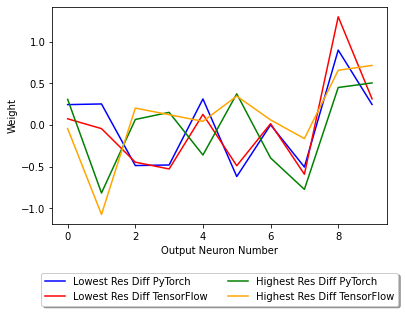

In [45]:
ax = plt.gca()
ax.plot(list(range(10)), list(top_mnist_pt_nofool.parameters())[-1].detach().numpy(), color="blue", label="Lowest Res Diff PyTorch", linestyle="solid")
#ax.plot(list(range(10)), list(top_mnist_pt.parameters())[-1].detach().numpy(), color="blue", label="Top PyTorch w/ Fool")
ax.plot(list(range(10)), top_mnist_tf_nofool.weights[-1].numpy(), color="red", label="Lowest Res Diff TensorFlow", linestyle="solid")
#ax.plot(list(range(10)), top_mnist_tf.weights[-1].numpy(), color="red", label="Top TensorFlow w/ Fool")
ax.plot(list(range(10)), list(bottom_mnist_pt_nofool.parameters())[-1].detach().numpy(), color="green", label="Highest Res Diff PyTorch", linestyle="solid")
#ax.plot(list(range(10)), list(bottom_mnist_pt.parameters())[-1].detach().numpy(), color="green", label="Bottom PyTorch w/ Fool")
ax.plot(list(range(10)), bottom_mnist_tf_nofool.weights[-1].numpy(), color="orange", label="Highest Res Diff TensorFlow", linestyle="solid")
#ax.plot(list(range(10)), bottom_mnist_tf.weights[-1].numpy(), color="orange", label="Bottom TensorFlow w/ Fool")
#ax.set_title("MNIST Classifier: Output Layer Weights for Best and Worst Hyperparameters")
ax.set_xlabel("Output Neuron Number")
ax.set_ylabel("Weight")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=2)
plt.show()